# Brain Tumor Multiclass Classification using MRI Images

#### Dataset Link: [Brain Tumor (MRI) Classification Dataset](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/)

# 0. Import packages and Setup Device

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score

from PIL import Image

from cnn_utils import see_dir, copy_img, create_augmented_img, train_loop, test_model, test_demo, plot_confusion_matrix

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 1. Reading the images

## 1.1 Before Transformation (Raw Image)

In [2]:
see_dir('Training')

There are 4 directories and 0 images in 'Training'.
There are 0 directories and 826 images in 'Training\glioma_tumor'.
There are 0 directories and 822 images in 'Training\meningioma_tumor'.
There are 0 directories and 395 images in 'Training\no_tumor'.
There are 0 directories and 827 images in 'Training\pituitary_tumor'.


In [3]:
see_dir('Testing')

There are 4 directories and 0 images in 'Testing'.
There are 0 directories and 100 images in 'Testing\glioma_tumor'.
There are 0 directories and 115 images in 'Testing\meningioma_tumor'.
There are 0 directories and 105 images in 'Testing\no_tumor'.
There are 0 directories and 74 images in 'Testing\pituitary_tumor'.


In [4]:
raw_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.ImageFolder(root='Training', transform=raw_transform)
test_dataset = torchvision.datasets.ImageFolder(root='Testing', transform=raw_transform)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [5]:
size_list = {}
for img, label in train_loader:
    curr_shape = str(img.shape)
    if curr_shape in size_list:
        size_list[curr_shape]+= 1
    else:
        size_list[curr_shape] = 1

size_list

{'torch.Size([1, 3, 512, 512])': 2309,
 'torch.Size([1, 3, 398, 497])': 1,
 'torch.Size([1, 3, 253, 278])': 1,
 'torch.Size([1, 3, 393, 313])': 1,
 'torch.Size([1, 3, 331, 272])': 1,
 'torch.Size([1, 3, 630, 630])': 14,
 'torch.Size([1, 3, 395, 341])': 2,
 'torch.Size([1, 3, 394, 295])': 1,
 'torch.Size([1, 3, 236, 236])': 46,
 'torch.Size([1, 3, 686, 626])': 1,
 'torch.Size([1, 3, 242, 208])': 2,
 'torch.Size([1, 3, 222, 233])': 1,
 'torch.Size([1, 3, 605, 600])': 1,
 'torch.Size([1, 3, 600, 494])': 1,
 'torch.Size([1, 3, 350, 350])': 10,
 'torch.Size([1, 3, 260, 236])': 4,
 'torch.Size([1, 3, 270, 250])': 1,
 'torch.Size([1, 3, 216, 224])': 1,
 'torch.Size([1, 3, 395, 367])': 1,
 'torch.Size([1, 3, 239, 211])': 1,
 'torch.Size([1, 3, 314, 329])': 1,
 'torch.Size([1, 3, 442, 442])': 15,
 'torch.Size([1, 3, 220, 236])': 2,
 'torch.Size([1, 3, 258, 314])': 1,
 'torch.Size([1, 3, 274, 230])': 1,
 'torch.Size([1, 3, 225, 225])': 30,
 'torch.Size([1, 3, 474, 474])': 2,
 'torch.Size([1, 3, 

In [6]:
class_names = train_dataset.classes
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

## 1.2 Data Augmentation

### Note: Don't run this section if 'Training-augmented' or similar augmented image folder exists.

In [7]:
custom_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomApply([transforms.ElasticTransform(alpha=50.0)], p=0.5),
])

create_augmented_img('Training/no_tumor', 'Training_augmented/no_tumor', target_count=820, augmentation_pipeline=custom_pipeline, use_torchvision=True)

🔄 Generating images until 820 is reached...
✅ Augmentation complete! 820 images available in 'Training_augmented/no_tumor'.


In [8]:
copy_img('Training/glioma_tumor', 'Training_augmented/glioma_tumor')
copy_img('Training/meningioma_tumor', 'Training_augmented/meningioma_tumor')
copy_img('Training/pituitary_tumor', 'Training_augmented/pituitary_tumor')

Copied file 'gg (1).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (10).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (100).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (101).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (102).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (103).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (104).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (105).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (106).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (107).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (108).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (109).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (11).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (110).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (111).jpg' to 'Training_augmented/glioma_tumor'
Copied file 'gg (112).jpg' to 'Training_augm

In [9]:
see_dir('Training_augmented')

There are 4 directories and 0 images in 'Training_augmented'.
There are 0 directories and 826 images in 'Training_augmented\glioma_tumor'.
There are 0 directories and 822 images in 'Training_augmented\meningioma_tumor'.
There are 0 directories and 820 images in 'Training_augmented\no_tumor'.
There are 0 directories and 827 images in 'Training_augmented\pituitary_tumor'.


## 1.3 After Transformation

In [10]:
train_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomApply([transforms.ElasticTransform(alpha=50.0)], p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = torchvision.datasets.ImageFolder(root='Training_augmented', transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root='Testing', transform=test_transform)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [11]:
print('Training Dataset:')
print(train_loader.dataset)
print('\n============================================\n\nTesting Dataset:')
print(test_loader.dataset)

Training Dataset:
Dataset ImageFolder
    Number of datapoints: 3295
    Root location: Training_augmented
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               Grayscale(num_output_channels=1)
               RandomApply(
               p=0.5
               ElasticTransform(alpha=[50.0, 50.0], sigma=[5.0, 5.0], interpolation=InterpolationMode.BILINEAR, fill=[0.0])
           )
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )


Testing Dataset:
Dataset ImageFolder
    Number of datapoints: 394
    Root location: Testing
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               

In [12]:
class_names = train_dataset.classes
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [13]:
class_idx = train_dataset.class_to_idx
class_idx

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [14]:
NUM_CLASSES = len(class_names)
NUM_CLASSES

4

# 2. Visualizing MRI Images

## 2.1 Visualizing Individual MRI Images

In [15]:
def visualize_image(image, label):
    plt.imshow(image.permute(1, 2, 0).numpy(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

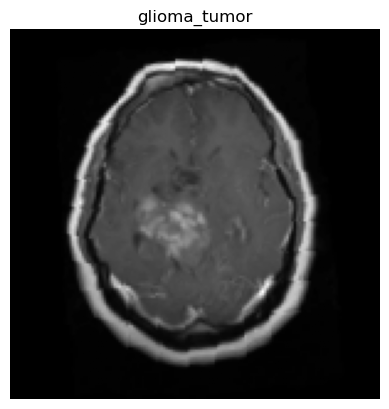

In [16]:
image, label = train_dataset[0]
visualize_image(image, label)

## 2.2 Visualizing Multiple Random MRI Images

In [17]:
def visualize_multiple_image(rows: int = 3, cols: int = 3):
    fig = plt.figure(figsize=(9, 9))
    for i in range(1, rows*cols+1):
        fig.add_subplot(rows, cols, i)
        random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
        image, label = train_dataset[random_idx]
        visualize_image(image, label)

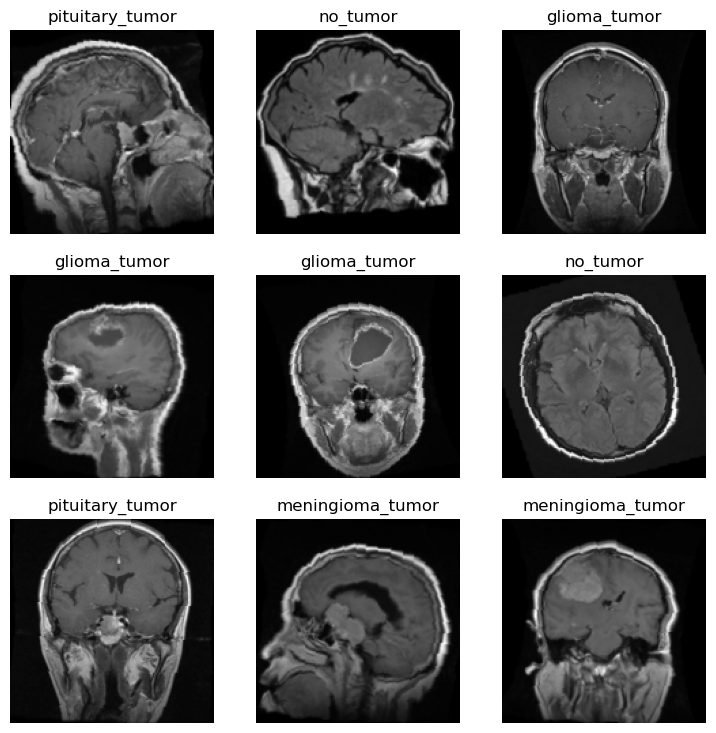

In [18]:
visualize_multiple_image()

# 3. CNN Model Build from Scratch

## 3.1 CNN Model

In [19]:
class CNNScratchModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(16, momentum=0.9),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(32, momentum=0.9),
            nn.ReLU(),
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(64, momentum=0.9),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*75*75,
                      out_features=4),
        )
    
    def forward(self, x):
        x = self.conv_block_1(x) 
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2: {x.shape}')
        x = self.conv_block_3(x)
        # print(f'Output shape of conv_block_3: {x.shape}')
        x = self.classifier(x)
        return x

## 3.2 Model Initialization

In [22]:
ScratchModel = CNNScratchModel().to(device=device)
ScratchModel

CNNScratchModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block_3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360000, out_features=4, bias=True)
  )
)

## 3.4 Loss, Optimizers and Evaluation Metrics

In [23]:
accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device=device)
precision = Precision(task="multiclass", num_classes=NUM_CLASSES, average="weighted").to(device=device)
recall = Recall(task="multiclass", num_classes=NUM_CLASSES, average="weighted").to(device=device)
f1score = F1Score(task="multiclass", num_classes=NUM_CLASSES, average="weighted").to(device=device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(ScratchModel.parameters(), lr=1e-3)

# 4. Train & Evaluation

# 4.1 Train & Test Model

In [25]:
epochs = 20
for epoch in range(epochs):
    print(f'Epoch: {epoch+1}\n-------')
    train_loop(model=ScratchModel,
               dataloader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               num_classes=NUM_CLASSES,
               device=device)
    test_loss, test_accuracy, test_recall, test_precision, test_f1score = test_model(model=ScratchModel,
                                                                                     dataloader=test_loader,
                                                                                     loss_fn=loss_fn,
                                                                                     num_classes=NUM_CLASSES,
                                                                                     device=device)
    print()

Epoch: 1
-------
Train loss: 4.64604 | Train Accuracy: 0.57 | Train Precision: 0.81 | Train Recall: 0.57 | Train F1-Score: 0.61
Test loss: 6.59844 | Test Accuracy: 0.50 | Test Precision: 0.37 | Test Recall: 0.50 | Test F1-Score: 0.41

Epoch: 2
-------
Train loss: 1.96370 | Train Accuracy: 0.69 | Train Precision: 0.85 | Train Recall: 0.69 | Train F1-Score: 0.72
Test loss: 5.53099 | Test Accuracy: 0.45 | Test Precision: 0.32 | Test Recall: 0.45 | Test F1-Score: 0.36

Epoch: 3
-------
Train loss: 1.08619 | Train Accuracy: 0.76 | Train Precision: 0.86 | Train Recall: 0.76 | Train F1-Score: 0.77
Test loss: 3.24912 | Test Accuracy: 0.50 | Test Precision: 0.34 | Test Recall: 0.50 | Test F1-Score: 0.39

Epoch: 4
-------
Train loss: 0.87071 | Train Accuracy: 0.80 | Train Precision: 0.89 | Train Recall: 0.80 | Train F1-Score: 0.81
Test loss: 5.50283 | Test Accuracy: 0.53 | Test Precision: 0.41 | Test Recall: 0.53 | Test F1-Score: 0.45

Epoch: 5
-------
Train loss: 0.62744 | Train Accuracy: 0.83 

## 4.2 Evaluation

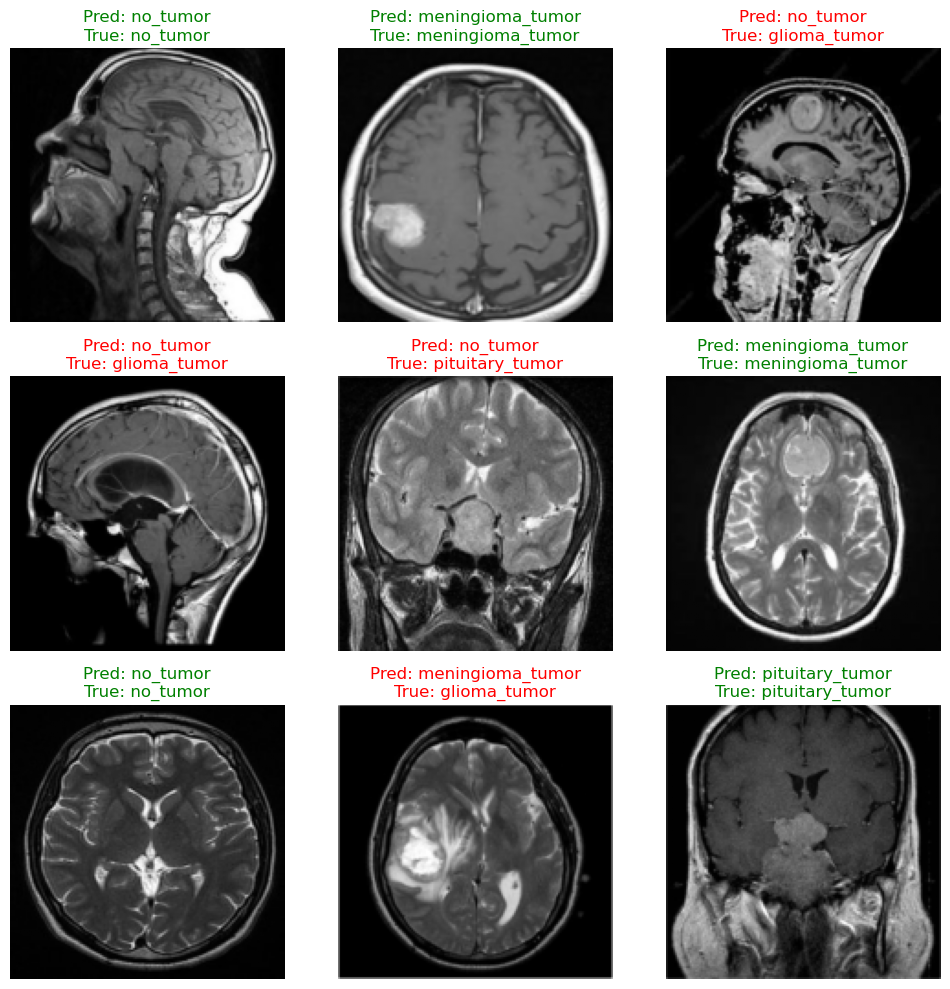

In [26]:
test_demo(ScratchModel, test_loader, class_names, device)

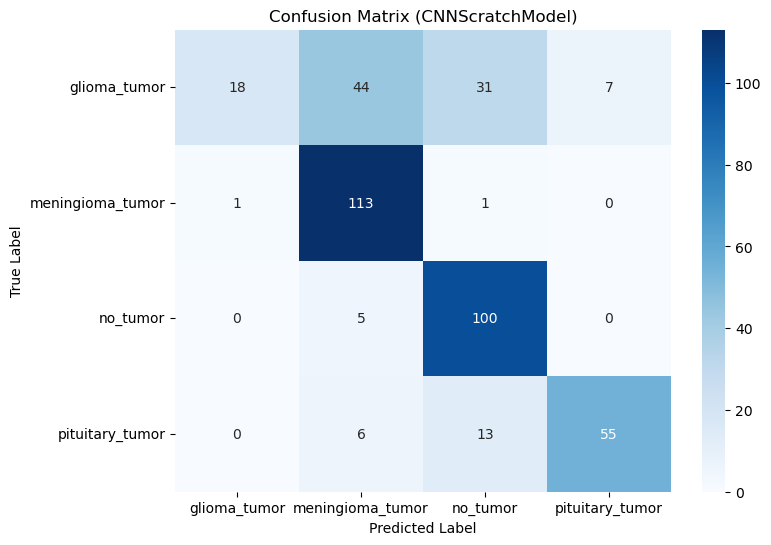

In [27]:
plot_confusion_matrix(ScratchModel, test_loader, class_names, device)

# 5. Build Model using EfficientNetB0

## 5.1 Intialize Model

In [28]:
import torchvision.models as models
efficientnetModel = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
efficientnetModel.features[0][0] = nn.Conv2d(in_channels=1,
                                             out_channels=32,
                                             kernel_size=3,
                                             stride=2,
                                             padding=1,
                                             bias=False)
in_features = efficientnetModel.classifier[1].in_features
efficientnetModel.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(in_features=in_features,
              out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64,
              out_features=4)
)

In [29]:
efficientnetModel

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

## 5.2 Freeze layers

In [30]:
for param in efficientnetModel.parameters():
    param.requires_grad = False

for param in efficientnetModel.classifier.parameters():
    param.requires_grad = True

## 5.3 Loss, Optimizers and Evaluation Metrics

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(efficientnetModel.parameters(), lr=1e-3)

In [33]:
epochs = 20
for epoch in range(epochs):
    print(f'Epoch: {epoch+1}\n-------')
    train_loop(model=efficientnetModel,
               dataloader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               num_classes=NUM_CLASSES,
               device=device)
    test_loss, test_accuracy, test_recall, test_precision, test_f1score = test_model(model=efficientnetModel,
                                                                                     dataloader=test_loader,
                                                                                     loss_fn=loss_fn,
                                                                                     num_classes=NUM_CLASSES,
                                                                                     device=device)
    print()

Epoch: 1
-------
Train loss: 1.37728 | Train Accuracy: 0.31 | Train Precision: 0.45 | Train Recall: 0.31 | Train F1-Score: 0.33
Test loss: 1.37319 | Test Accuracy: 0.34 | Test Precision: 0.17 | Test Recall: 0.34 | Test F1-Score: 0.22

Epoch: 2
-------
Train loss: 1.35818 | Train Accuracy: 0.38 | Train Precision: 0.48 | Train Recall: 0.38 | Train F1-Score: 0.38
Test loss: 1.36174 | Test Accuracy: 0.36 | Test Precision: 0.19 | Test Recall: 0.36 | Test F1-Score: 0.24

Epoch: 3
-------
Train loss: 1.33737 | Train Accuracy: 0.46 | Train Precision: 0.53 | Train Recall: 0.46 | Train F1-Score: 0.45
Test loss: 1.35025 | Test Accuracy: 0.38 | Test Precision: 0.20 | Test Recall: 0.38 | Test F1-Score: 0.26

Epoch: 4
-------
Train loss: 1.31513 | Train Accuracy: 0.51 | Train Precision: 0.59 | Train Recall: 0.51 | Train F1-Score: 0.51
Test loss: 1.33875 | Test Accuracy: 0.42 | Test Precision: 0.26 | Test Recall: 0.42 | Test F1-Score: 0.30

Epoch: 5
-------
Train loss: 1.29061 | Train Accuracy: 0.55 

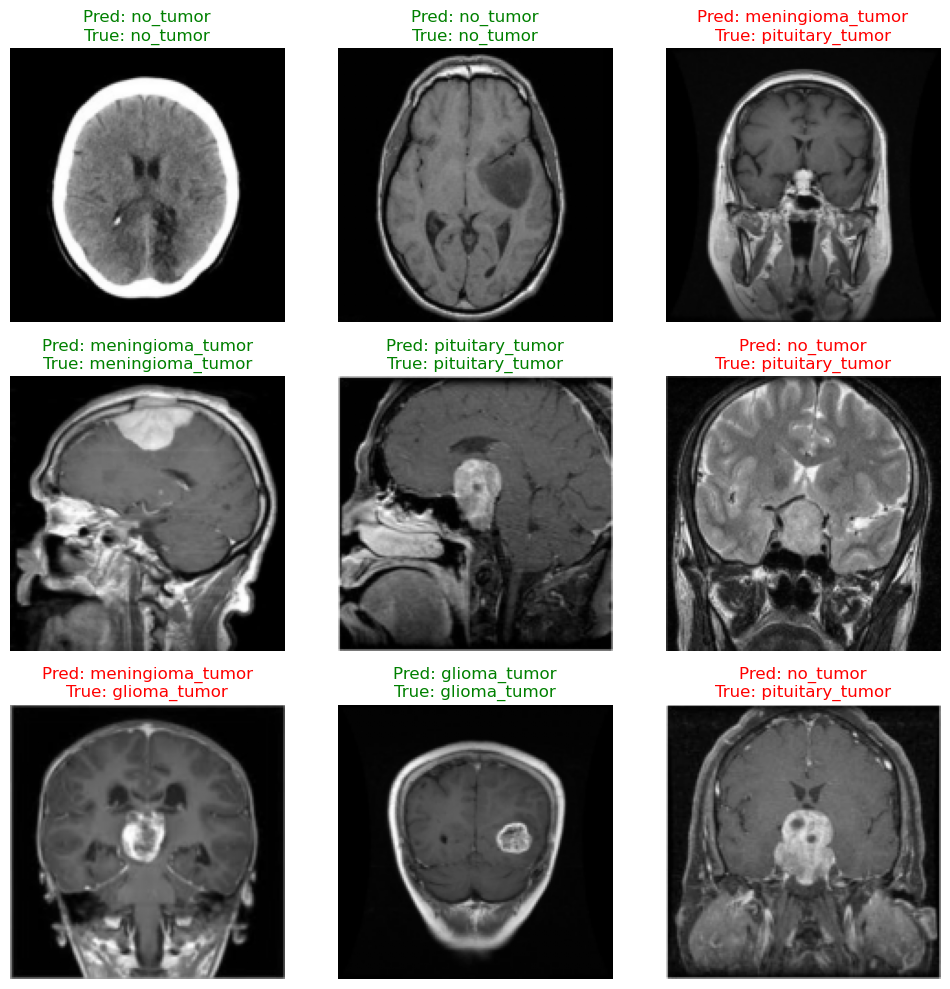

In [34]:
test_demo(efficientnetModel, test_loader, class_names, device)

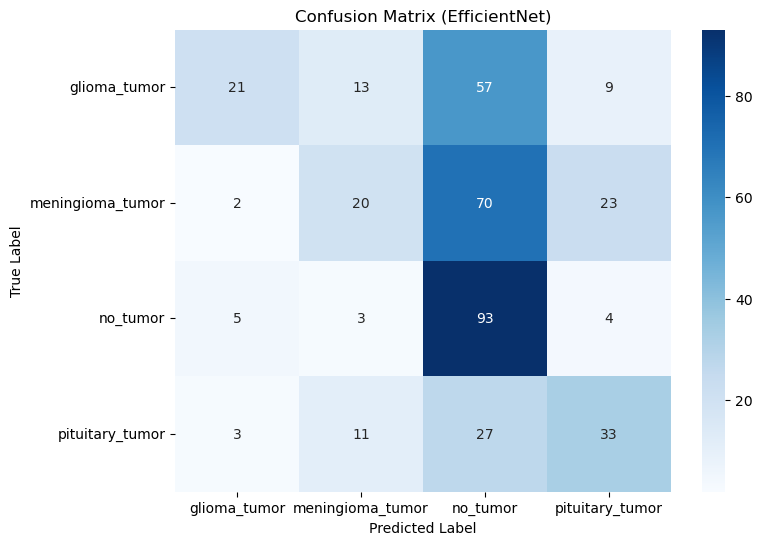

In [35]:
plot_confusion_matrix(efficientnetModel, test_loader, class_names, device)

# 6. Save Model

In [37]:
scratchModel_filename = 'scratch-model.pth'
efficientnetModel_filename = 'custom-efficientnet-model.pth'

torch.save(ScratchModel.state_dict(), scratchModel_filename)
torch.save(efficientnetModel.state_dict(), efficientnetModel_filename)

print(f'Pytorch model \'{ScratchModel.__class__.__name__}\' state saved to {scratchModel_filename}')
print(f'Pytorch model \'{efficientnetModel.__class__.__name__}\' state saved to {efficientnetModel_filename}')

Pytorch model 'CNNScratchModel' state saved to scratch-model.pth
Pytorch model 'EfficientNet' state saved to custom-efficientnet-model.pth


# 7. Load Saved Model

In [39]:
class model(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(16, momentum=0.9),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(32, momentum=0.9),
            nn.ReLU(),
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.BatchNorm2d(64, momentum=0.9),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*75*75,
                      out_features=4),
        )
    
    def forward(self, x):
        x = self.conv_block_1(x) 
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2: {x.shape}')
        x = self.conv_block_3(x)
        # print(f'Output shape of conv_block_3: {x.shape}')
        x = self.classifier(x)
        return x

In [115]:
loaded_model = model()

filename = 'scratch-model.pth'
loaded_model.load_state_dict(torch.load(filename, map_location=device))
loaded_model.to(device=device)
loaded_model.eval()
print("PyTorch model loaded successfully!")

image_path = 'Training/glioma_tumor/gg (1).jpg'
preprocess = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
img = Image.open(image_path)
img_tensor = preprocess(img).unsqueeze(0).to(device)

with torch.no_grad():
    prediction = loaded_model(img_tensor)
    probabilities = torch.softmax(prediction, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)
    print(f'\nProbabilities:')
    print(f'{list(class_idx.keys())[0]}: {np.round(probabilities.cpu().numpy()[0][0], 3)}')
    print(f'{list(class_idx.keys())[1]}: {np.round(probabilities.cpu().numpy()[0][1], 3)}')
    print(f'{list(class_idx.keys())[2]}: {np.round(probabilities.cpu().numpy()[0][2], 3)}')
    print(f'{list(class_idx.keys())[3]}: {np.round(probabilities.cpu().numpy()[0][3], 3)}')
    
    class_pred = list(class_idx.keys())[predicted_class.item()]
    true_class = image_path.split('/')[-2] 
    print(f'\nPrediction: {class_pred}')
    print(f'True Value: {true_class}')

PyTorch model loaded successfully!

Probabilities:
glioma_tumor: 1.0
meningioma_tumor: 0.0
no_tumor: 0.0
pituitary_tumor: 0.0

Prediction: glioma_tumor
True Value: glioma_tumor


Text(0.5, 1.0, 'Pred: glioma_tumor\nTrue: glioma_tumor')

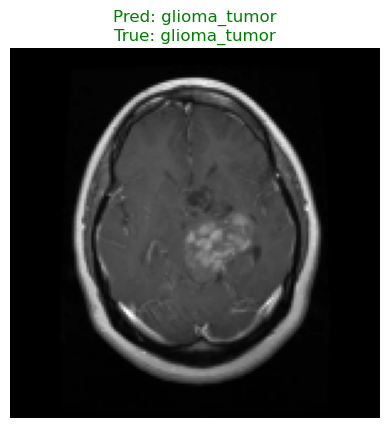

In [116]:
visualize_image(img_tensor.squeeze(0).cpu(), predicted_class)
title = f"Pred: {class_pred}\nTrue: {true_class}"
color = 'green' if class_pred == true_class else 'red'
plt.title(title, color=color)